In [1]:
from study_help import load_studies
from study_visualize import *
from study import Study

from pathlib import Path

In [2]:
studies = load_studies(Path.cwd().parent / 'study_data')

In [17]:
for s in studies:
    s.print_explanations()

Study 251570_ours
Response #1
Familiarity: 2
Question 1: Correct: -1; Answer: 1, dark wings
Question 2: Correct: -1; Answer: -0.3333333333333333, unclear if wings are dark or not
Question 3: Correct: -1; Answer: 1, 
Question 4: Correct: 1; Answer: -1, 
Question 5: Correct: 1; Answer: -1, 
Question 6: Correct: -1; Answer: 1, 
Question 7: Correct: -1; Answer: 1, 
Question 8: Correct: 1; Answer: -1, 
Question 9: Correct: 1; Answer: -1, 
Question 10: Correct: 1; Answer: -1, 
Average accuracy: 0.1
Mental Model: color of wings is the easiest feature for distinguishing them
Response #2
Familiarity: 2
Question 1: Correct: -1; Answer: -0.3333333333333333, 
Question 2: Correct: -1; Answer: -0.3333333333333333, 
Question 3: Correct: -1; Answer: -0.3333333333333333, 
Question 4: Correct: 1; Answer: 0.3333333333333333, 
Question 5: Correct: 1; Answer: -0.3333333333333333, 
Question 6: Correct: -1; Answer: -0.3333333333333333, 
Question 7: Correct: -1; Answer: -0.3333333333333333, 
Question 8: Corre

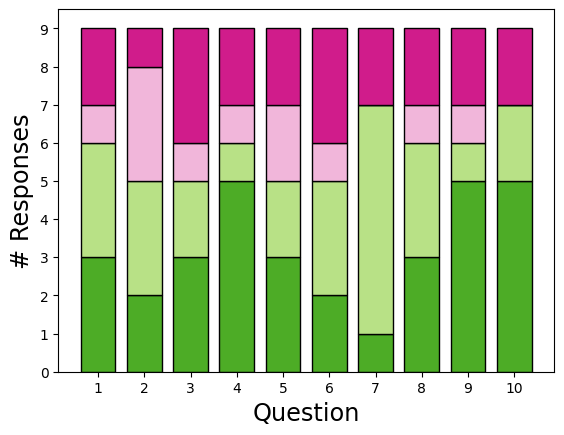

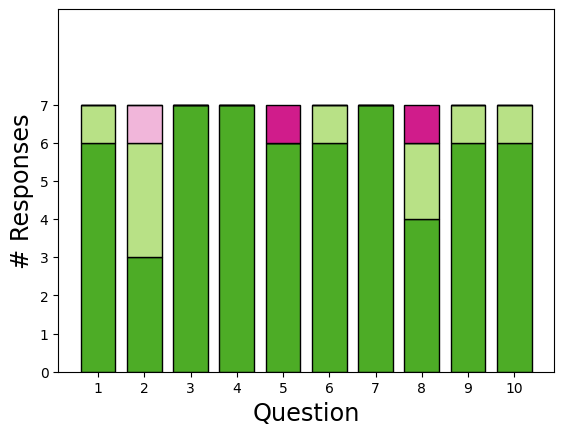

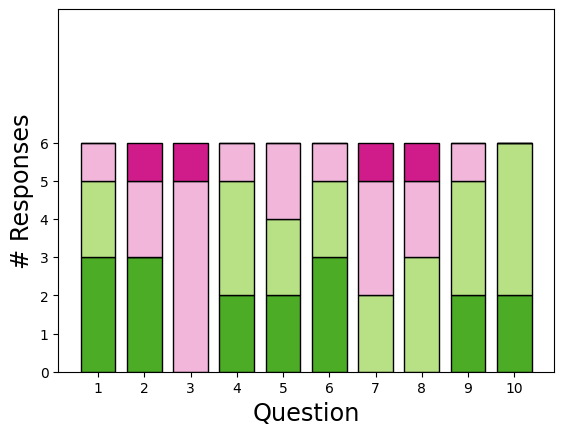

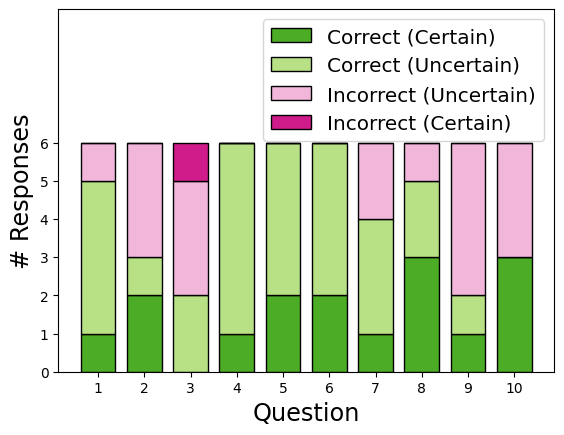

In [4]:
max_count = max([len(s.responses) for s in studies])
for i, s in enumerate(studies):
    visualize_accuracy(s, max_count=max_count, legend="upper right" if i == 3 else None)

In [5]:
for s in studies:
    count_answers(s)
    count_answers(s, "(wing|mantle|feather)+")
    count_answers(s, "(wing|color|colour)+")  
    count_answers(s, "(wing|color|colour|feather)+")  

Study 251570_ours has 8 matches for query \S.
Study 251570_ours has 8 matches for query (wing|mantle|feather)+.
Study 251570_ours has 6 matches for query (wing|color|colour)+.
Study 251570_ours has 7 matches for query (wing|color|colour|feather)+.
Study 251570_vandenhende has 6 matches for query \S.
Study 251570_vandenhende has 6 matches for query (wing|mantle|feather)+.
Study 251570_vandenhende has 5 matches for query (wing|color|colour)+.
Study 251570_vandenhende has 6 matches for query (wing|color|colour|feather)+.
Study 433137_ours has 6 matches for query \S.
Study 433137_ours has 4 matches for query (wing|mantle|feather)+.
Study 433137_ours has 1 matches for query (wing|color|colour)+.
Study 433137_ours has 5 matches for query (wing|color|colour|feather)+.
Study 433137_vandenhende has 5 matches for query \S.
Study 433137_vandenhende has 0 matches for query (wing|mantle|feather)+.
Study 433137_vandenhende has 4 matches for query (wing|color|colour)+.
Study 433137_vandenhende has 4 

In [6]:
for s in studies:
    print(s.name)
    compare_answers(s.responses)

251570_ours
wing appeared 5 time(s).
white appeared 4 time(s).
feather appeared 3 time(s).
color appeared 3 time(s).
dark appeared 2 time(s).
bill appeared 2 time(s).
251570_vandenhende
wing appeared 5 time(s).
color appeared 3 time(s).
bill appeared 3 time(s).
gray appeared 3 time(s).
feathers appeared 2 time(s).
body appeared 2 time(s).
spots appeared 2 time(s).
shape appeared 2 time(s).
legs appeared 2 time(s).
white appeared 2 time(s).
tubenose appeared 2 time(s).
433137_ours
eye appeared 5 time(s).
feather appeared 4 time(s).
beak appeared 2 time(s).
dark appeared 2 time(s).
pattern appeared 2 time(s).
stripes appeared 2 time(s).
433137_vandenhende
color appeared 4 time(s).
around appeared 3 time(s).
eye appeared 3 time(s).
head appeared 3 time(s).
stripe appeared 2 time(s).


Study 251570_ours received 9 responses.
Study 251570_vandenhende received 7 responses.
Study 433137_ours received 6 responses.
Study 433137_vandenhende received 6 responses.
Total responses received: 28
{'University E-mail': array([9., 6., 1., 0., 0.]), 'Bird Forums': array([0., 2., 1., 4., 2.]), 'Other': array([1., 1., 1., 0., 0.])}


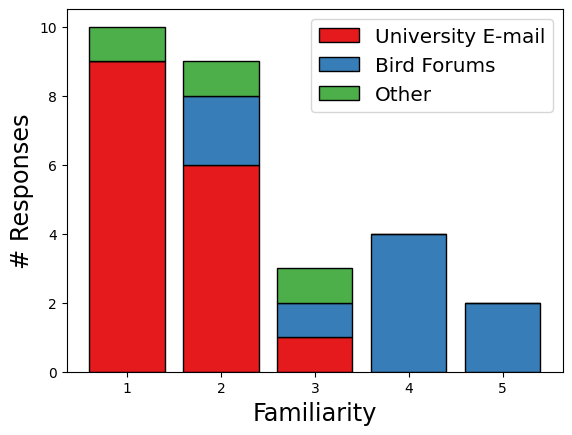

In [7]:
visualize_familiarity_count(studies)

In [8]:
for s in studies:
    print(f"Average familiarity for study {s.name}: {np.average([r.familiarity for r in s.responses])}")
    print(f"Fraction of certain answers for {s.name}: {np.count_nonzero([[abs(a) == 1 for a in r.main_testing] for r in s.responses]) / np.count_nonzero([[a for a in r.main_testing] for r in s.responses])}")

Average familiarity for study 251570_ours: 2.4444444444444446
Fraction of certain answers for 251570_ours: 0.5888888888888889
Average familiarity for study 251570_vandenhende: 2.7142857142857144
Fraction of certain answers for 251570_vandenhende: 0.8571428571428571
Average familiarity for study 433137_ours: 1.6666666666666667
Fraction of certain answers for 433137_ours: 0.35
Average familiarity for study 433137_vandenhende: 2.0
Fraction of certain answers for 433137_vandenhende: 0.2833333333333333


In [9]:
for s in studies:
    s.evaluate()

Response 0 of study 251570_ours has an accuracy of 0.1
Response 1 of study 251570_ours has an accuracy of 0.9
Response 2 of study 251570_ours has an accuracy of 0.6
Response 3 of study 251570_ours has an accuracy of 1.0
Response 4 of study 251570_ours has an accuracy of 0.1
Response 5 of study 251570_ours has an accuracy of 1.0
Response 6 of study 251570_ours has an accuracy of 0.3
Response 7 of study 251570_ours has an accuracy of 0.9
Response 8 of study 251570_ours has an accuracy of 0.9
Average accuracy for study 251570_ours is 0.6444444444444445
Response 0 of study 251570_vandenhende has an accuracy of 1.0
Response 1 of study 251570_vandenhende has an accuracy of 1.0
Response 2 of study 251570_vandenhende has an accuracy of 1.0
Response 3 of study 251570_vandenhende has an accuracy of 1.0
Response 4 of study 251570_vandenhende has an accuracy of 0.9
Response 5 of study 251570_vandenhende has an accuracy of 0.9
Response 6 of study 251570_vandenhende has an accuracy of 0.9
Average ac

In [10]:
Study(studies[0].truth, "combined_ours", np.array([r for s in [studies[0], studies[2]] for r in s.responses]).flatten()).evaluate()
Study(studies[0].truth, "combined_existing", np.array([r for s in [studies[1], studies[3]] for r in s.responses]).flatten()).evaluate()

Response 0 of study combined_ours has an accuracy of 0.1
Response 1 of study combined_ours has an accuracy of 0.9
Response 2 of study combined_ours has an accuracy of 0.6
Response 3 of study combined_ours has an accuracy of 1.0
Response 4 of study combined_ours has an accuracy of 0.1
Response 5 of study combined_ours has an accuracy of 1.0
Response 6 of study combined_ours has an accuracy of 0.3
Response 7 of study combined_ours has an accuracy of 0.9
Response 8 of study combined_ours has an accuracy of 0.9
Response 9 of study combined_ours has an accuracy of 0.3
Response 10 of study combined_ours has an accuracy of 0.8
Response 11 of study combined_ours has an accuracy of 0.8
Response 12 of study combined_ours has an accuracy of 0.4
Response 13 of study combined_ours has an accuracy of 0.7
Response 14 of study combined_ours has an accuracy of 0.8
Average accuracy for study combined_ours is 0.64
Response 0 of study combined_existing has an accuracy of 1.0
Response 1 of study combined_e

Response 0 of study 251570_ours_no_outliers has an accuracy of 0.9
Response 1 of study 251570_ours_no_outliers has an accuracy of 0.6
Response 2 of study 251570_ours_no_outliers has an accuracy of 1.0
Response 3 of study 251570_ours_no_outliers has an accuracy of 1.0
Response 4 of study 251570_ours_no_outliers has an accuracy of 0.3
Response 5 of study 251570_ours_no_outliers has an accuracy of 0.9
Response 6 of study 251570_ours_no_outliers has an accuracy of 0.9
Average accuracy for study 251570_ours_no_outliers is 0.8


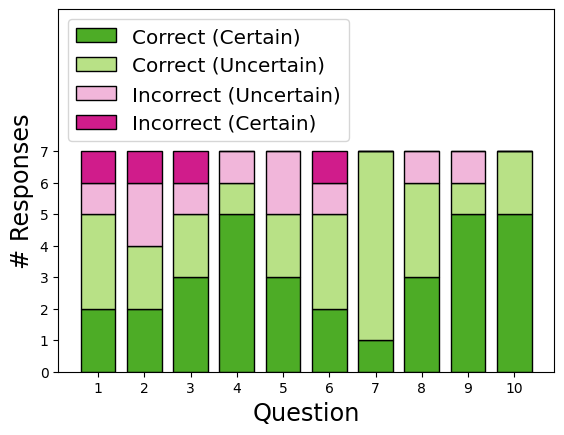

Spearman correlation is 0.019607843137254898, pvalue = 0.9667190902161872


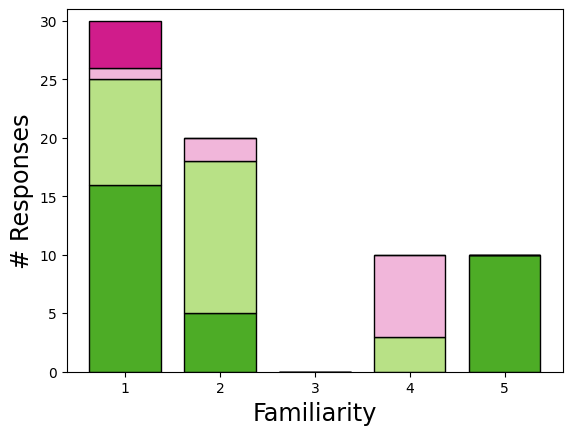

In [11]:
study_ours_no_outliers = Study(studies[0].truth, "251570_ours_no_outliers", [r for i, r in enumerate(studies[0].responses) if i != 0 and i != 4])
study_ours_no_outliers.evaluate()

visualize_accuracy(study_ours_no_outliers, max_count=len(study_ours_no_outliers.responses) + 4, legend="upper left")
visualize_familiarity_accuracy(study_ours_no_outliers)

In [12]:
# visualize_familiarity_correlation(studies)

[[[9, 9, 3, 4, 2], [1, 0, 0, 0, 0]], [[3, 7, 3, 4, 2], [7, 2, 0, 0, 0]], [[0, 1, 1, 3, 2], [10, 8, 2, 1, 0]]]


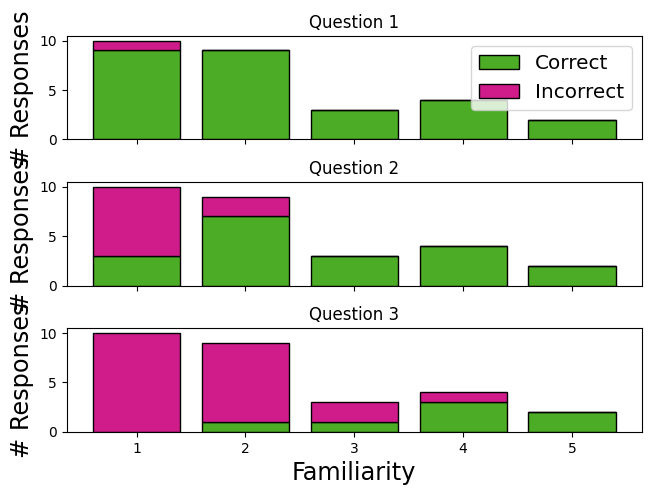

In [13]:
visualize_familiarity_correlation_bar(studies)

Spearman correlation is -0.1822384219130772, pvalue = 0.6388686797190368


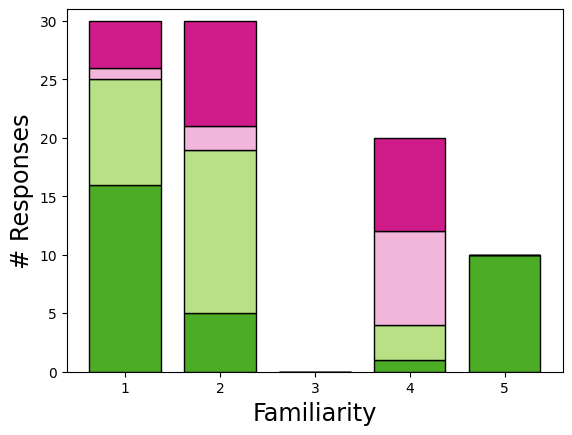

Spearman correlation is 0.29673273237950815, pvalue = 0.5181324383003797


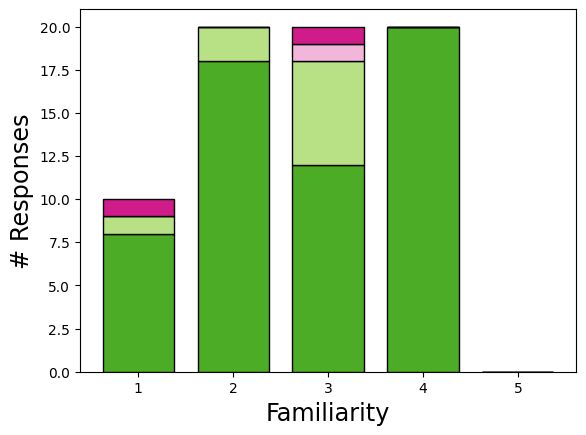

Spearman correlation is -0.2623303343135812, pvalue = 0.6155309186350417


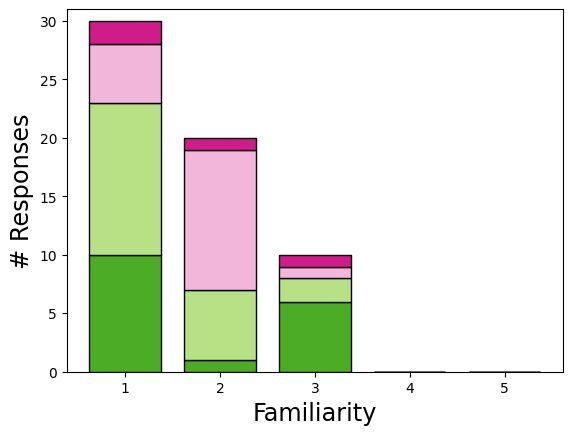

Spearman correlation is 0.5833333333333334, pvalue = 0.22424768518518484


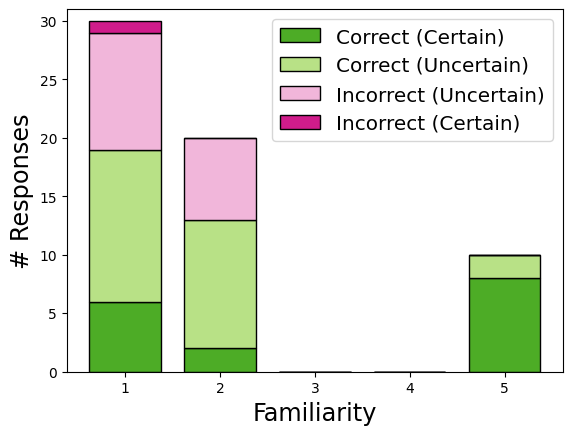

In [14]:
for i, s in enumerate(studies):
    visualize_familiarity_accuracy(s, legend="upper right" if i == 3 else None)

In [15]:
# for s in studies:
#     visualize_familiarity(s)

In [16]:
# for s in studies:
#     visualize_main_results(s, show_individual=False)